In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Preprocess:
    def __init__(self, path ):
        self.path = path
        self.scaler = MinMaxScaler(feature_range=(0, 1))

    def read_data(self):
        """Read data and return a data frame"""
        df = pd.read_csv(self.path)
        df = df.set_index("DATE")
        df.index = pd.to_datetime(df.index)
        return df
            
        # Create supervised learning data (sliding window)
    def create_supervised(self,data, lag=1):
        X, y = [], []
        for i in range(len(data) - lag):
            X.append(data[i:i + lag])
            y.append(data[i + lag])
        return np.array(X), np.array(y)
    
    def create_features(self,df, att):
        """Create time series features based  on time series index"""
        values = df[att].values.reshape(-1, 1)
        # Scale the data using MinMaxScaler
        scaled_data = self.scaler.fit_transform(values)
        # Use a lag of 12 (for example)
        lag = 12
        X, y = self.create_supervised(scaled_data, lag)
        return X, y
    


In [3]:
path = "data/IPG2211A2N.csv"
f1 = Preprocess(path)
df = f1.read_data()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IPG2211A2N,1030.0,56.821588,35.982935,3.3336,20.968675,56.9096,89.5908,126.3772


<Axes: title={'center': 'IPG2211A2N PRODUCTION per month'}, xlabel='DATE'>

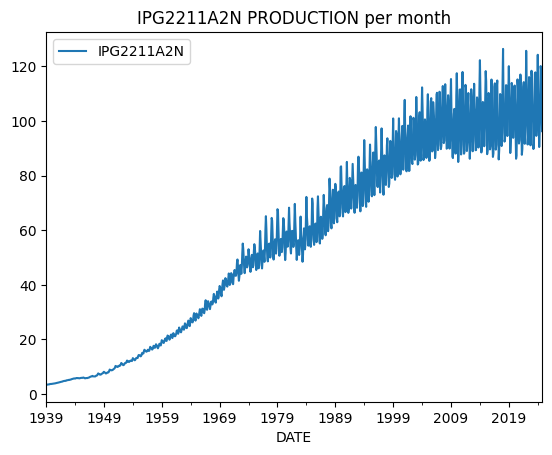

In [4]:
df[['IPG2211A2N']].plot(title='IPG2211A2N PRODUCTION per month')

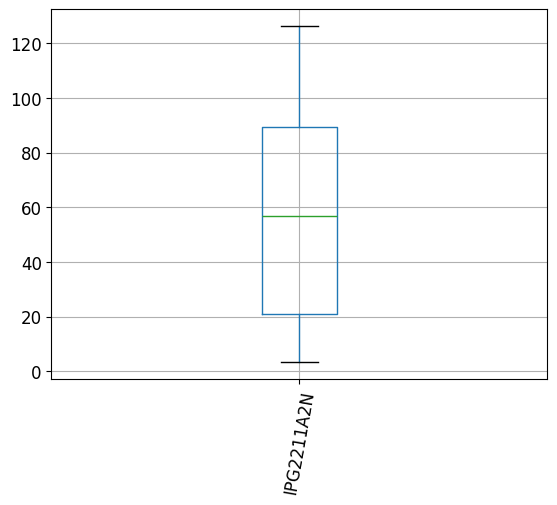

In [5]:
df.boxplot('IPG2211A2N', rot = 80, fontsize = '12',grid = True);

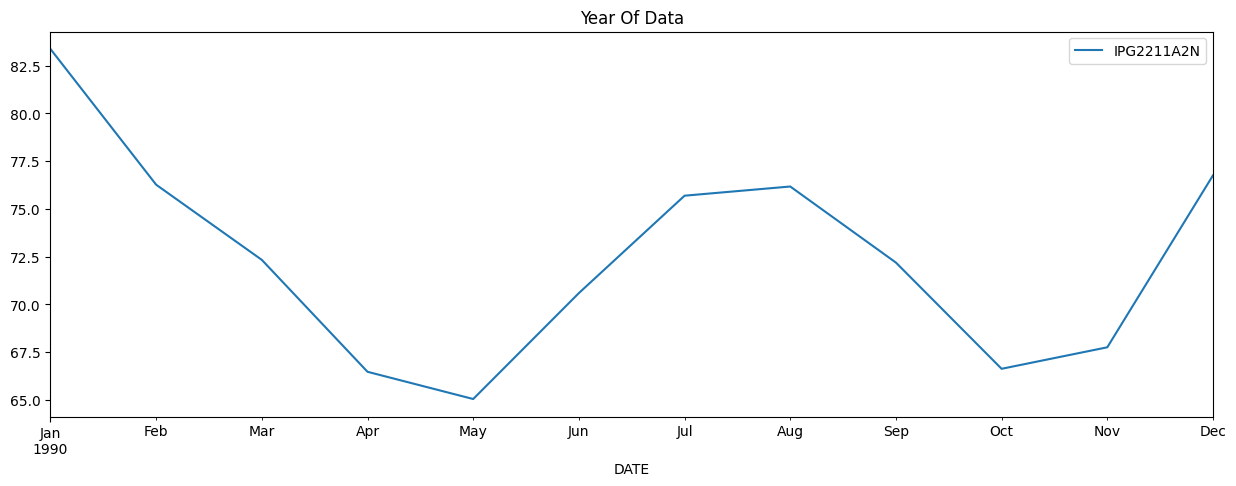

In [6]:
df.loc[(df.index >= '1990-01-01') & (df.index < '1991-01-01')] \
    .plot(figsize=(15, 5), title='Year Of Data')
plt.show()

Text(0.5, 1.0, 'IP per month')

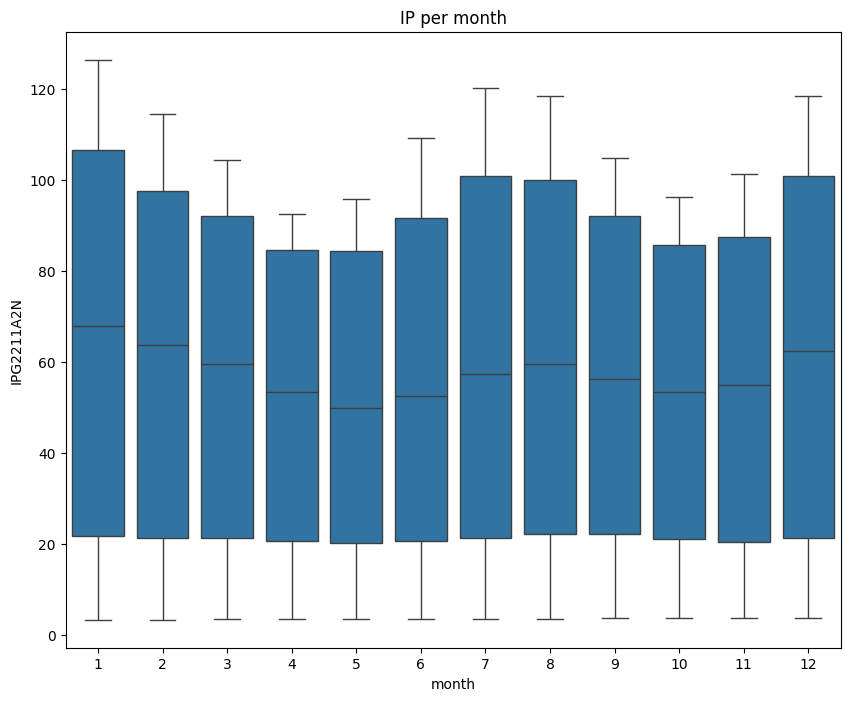

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
df2 = df.copy()
df2["month"] = df2.index.month
sns.boxplot(data=df2[["month","IPG2211A2N"]], x ="month", y ="IPG2211A2N" )
ax.set_title("IP per month")

In [ ]:
"""
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label='Training Set', title="Train - Test Split")
test.plot(ax=ax, label='Test Set')
ax.axvline('1990-06-01', color='black', ls='--')
ax.legend (['Training Set' , 'Test Set'])
plt.plot()
"""

In [9]:
X, y = f1.create_features(df ,'IPG2211A2N' )
# Split into training and testing sets
split_index = int(len(X) * 0.8)  # Use 80% for training, 20% for testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Check the shapes of the datasets before reshaping for LSTM
print(f"X_train shape before reshape: {X_train.shape}, X_test shape before reshape: {X_test.shape}")

# Reshape input data for LSTM (3D shape: [samples, time_steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adding '1' as the number of features
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Check the shapes after reshaping
print(f"X_train shape after reshape: {X_train.shape}, X_test shape after reshape: {X_test.shape}")





X_train shape before reshape: (814, 12, 1), X_test shape before reshape: (204, 12, 1)
X_train shape after reshape: (814, 12, 1), X_test shape after reshape: (204, 12, 1)
